Nama: Tanaya Marta Desmanda Student  ID: 1101220029

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
#mengimport packages yang diperlukan

In [2]:
ya = pd.read_csv("FuelConsumptionCo2.csv")
ya.head()
#read data

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
ya.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [4]:
cry = ya[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cry.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212


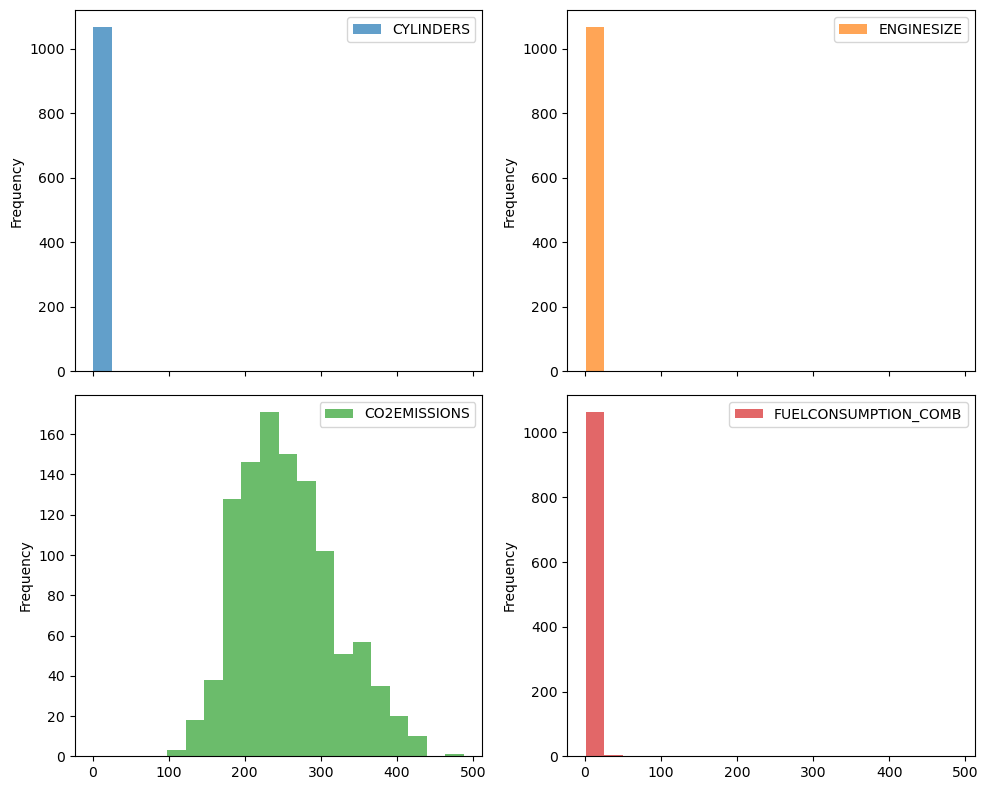

In [5]:
cry[['CYLINDERS', 'ENGINESIZE', 'CO2EMISSIONS', 'FUELCONSUMPTION_COMB']].plot.hist(
    subplots=True, layout=(2, 2), figsize=(10, 8), bins=20, alpha=0.7)
plt.tight_layout()
plt.show()

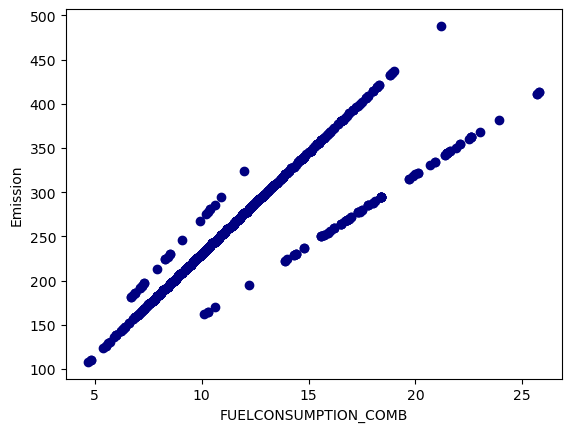

In [6]:
plt.scatter(cry['FUELCONSUMPTION_COMB'], cry['CO2EMISSIONS'], color='navy')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

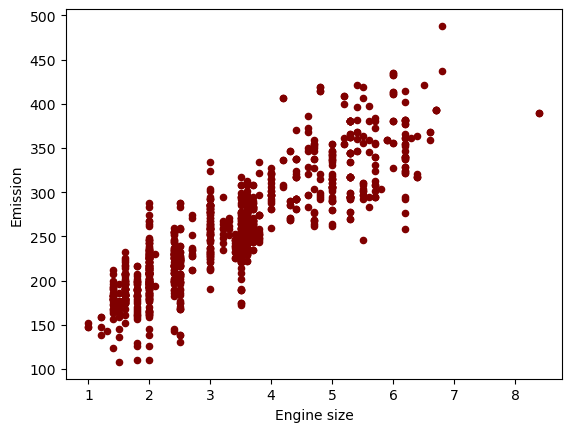

In [7]:
cry.plot.scatter(x='ENGINESIZE', y='CO2EMISSIONS', color='maroon')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [9]:
msk = np.random.rand(len(ya)) < 0.8
train = cry[msk]
test = cry[~msk]

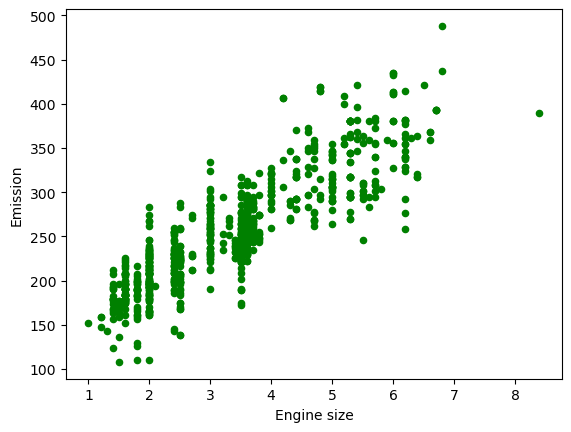

In [10]:
train.plot.scatter(x='ENGINESIZE', y='CO2EMISSIONS', color='green')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [12]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
X_train = np.asanyarray(train[['ENGINESIZE']])
y_train = np.asanyarray(train[['CO2EMISSIONS']])

lr.fit(X_train, y_train)

print('Coefficients:', lr.coef_)
print('Intercept:', lr.intercept_)

Coefficients: [[39.63569337]]
Intercept: [123.69423241]


In [13]:
# Siapkan data training
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

# Buat model dan latih
regr = LinearRegression()
regr.fit(train_x, train_y)

LinearRegression()

C:\Users\MANDA\Documents\SEMESTER 6\anaconda\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


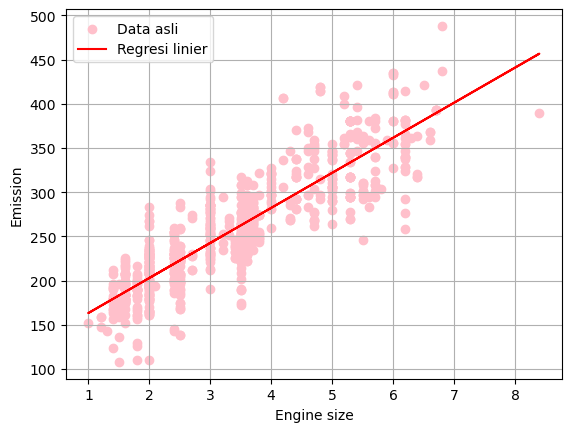

In [14]:
import matplotlib.pyplot as plt

plt.scatter(train["ENGINESIZE"], train["CO2EMISSIONS"], color='pink', label="Data asli")
plt.plot(train["ENGINESIZE"], regr.predict(train[["ENGINESIZE"]]), '-r', label="Regresi linier")
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.legend()
plt.grid(True)
plt.show()